# CodeGeo Workshop : Understanding Random Forest

### Our goal here is to predict the water level at Hagestein station (value column). To achieve this, we consider variables such as discharge at the Rhine (QRhine) and Meuse (QMeuse), water level at Haringvliet (WLHv), precipitation (RH) and evaporation (EV24). 

### We have daily data spanning from May 01, 1981 to March 03, 2019.  

### For information about data, we refer to Hauswirth, Sandra M., et al. "The potential of data driven approaches for quantifying hydrological extremes." Advances in Water Resources 155 (2021): 104017 (https://doi.org/10.1016/j.advwatres.2021.104017) 


In [122]:
import pandas as pd
import requests
import io
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import numpy as np

### Read the data

In [100]:
data_url =  "https://github.com/Jignesh1594/CodeGeoworkshop_02_understanding_RF/raw/master/data.pkl"
response = requests.get(data_url)

data = pd.read_pickle(io.BytesIO(response.content))

In [101]:
print(data.head())

                                WLHv     RH  EV24  QMeuse  QRhine   value  \
date                                                                        
1981-05-01 00:00:00+00:00 -18.395833    1.0  24.0   290.0  2579.0  269.72   
1981-05-22 00:00:00+00:00  -3.223881  177.0  23.0   167.0  1914.0  290.68   
1981-05-23 00:00:00+00:00 -13.020833   46.0  17.0   158.0  1864.0  289.52   
1981-05-24 00:00:00+00:00   2.618056   77.0  23.0   144.0  1777.0  287.88   
1981-05-25 00:00:00+00:00   5.812500   43.0  17.0   151.0  1759.0  290.92   

                           coordsys            lon           lat  station  
date                                                                       
1981-05-01 00:00:00+00:00   25831.0  646656.911653  5.762067e+06  HAGSBVN  
1981-05-22 00:00:00+00:00   25831.0  646656.911653  5.762067e+06  HAGSBVN  
1981-05-23 00:00:00+00:00   25831.0  646656.911653  5.762067e+06  HAGSBVN  
1981-05-24 00:00:00+00:00   25831.0  646656.911653  5.762067e+06  HAGSBVN  
1981

In [102]:
input_data = data[['WLHv', 'RH', 'EV24', 'QMeuse', 'QRhine']]
output_data = data['value']

### Splitting the data into train and test dataset

Here we allocate 90% of the data for training and the remaining 10% for testing. It is important to note that we set shuffle = False to preserve the time series nature of the data

In [103]:
X_train, X_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.1, shuffle=False)

### Hyperparameter of Random Forest
* max_samples = Proportion of training data to be used train individual tree. Default is *None* indicating proportion of training data is same as training data but some samples will get repeated due to bootstraping.  
* max_features = How many features (input data columns) to consider when splitting the data. Deafult is *1.0* indicating all the features.
* n_estimators = Number of trees in forest. Default is *100*
* max_depth = maximum depth of each tree from root node to leaf node. Default is *None* indicating no maximum depth

More information is available at https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

### First lets train random forest with default hyperparameter

In [104]:
model_default = RandomForestRegressor(random_state=42)
model_default.fit(X_train, y_train)  

RandomForestRegressor(random_state=42)

### Make prediction on test dataset

In [105]:
rf_prediction_default = model_default.predict(X_test)

### Lets check R2 score for predicted data

In [106]:
score_default = r2_score(y_test, rf_prediction_default)
print(f'R2 cofficient for default model: {score_default}')

R2 cofficient for default model: 0.7033895891287364


### Lets visualize the results 

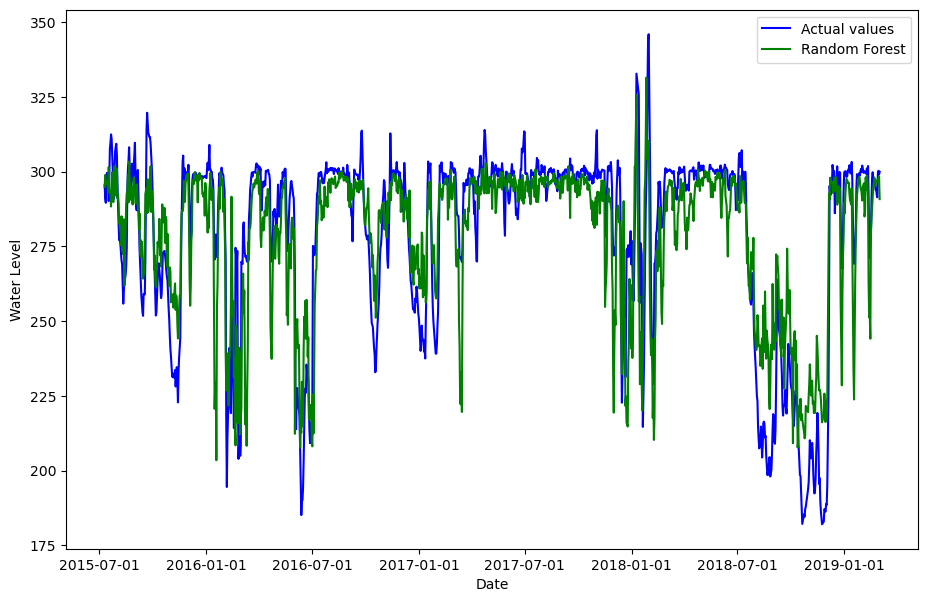

In [107]:
import matplotlib.dates as mdates

plt.figure(figsize=(11, 7))
plt.plot(y_test.index, y_test, label='Actual values', color='b')
plt.plot(y_test.index, rf_prediction_default, label='Random Forest', color='g')
plt.xlabel('Date')
plt.ylabel('Water Level')
plt.legend()

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.show()

In random forests, when you make predictions on a test dataset, the model returns the average predictions from all the trees in the forest. However, you can also access the predictions from individual trees. Lets do this for one sample.

In [116]:
test_sample_input = pd.DataFrame(X_test.iloc[0]).transpose()
test_sample_output =y_test.iloc[0]

In [125]:
predictions_samples = [tree.predict(np.array(test_sample_input)) for tree in model_default.estimators_]

In [126]:
print(predictions_samples)

[array([300.20833333]), array([293.20833333]), array([291.83333333]), array([292.79166667]), array([293.20833333]), array([296.375]), array([291.41666667]), array([296.375]), array([293.91666667]), array([261.68]), array([300.91666667]), array([291.83333333]), array([293.29166667]), array([293.20833333]), array([293.91666667]), array([293.29166667]), array([300.58333333]), array([293.91666667]), array([296.375]), array([293.20833333]), array([298.66666667]), array([293.20833333]), array([293.20833333]), array([293.91666667]), array([297.66666667]), array([297.54166667]), array([287.04166667]), array([301.]), array([297.66666667]), array([293.91666667]), array([301.375]), array([295.44]), array([301.5]), array([287.45833333]), array([293.91666667]), array([293.20833333]), array([294.70833333]), array([299.70833333]), array([298.66666667]), array([287.04166667]), array([296.375]), array([300.20833333]), array([293.91666667]), array([298.5]), array([293.20833333]), array([297.54166667]), 

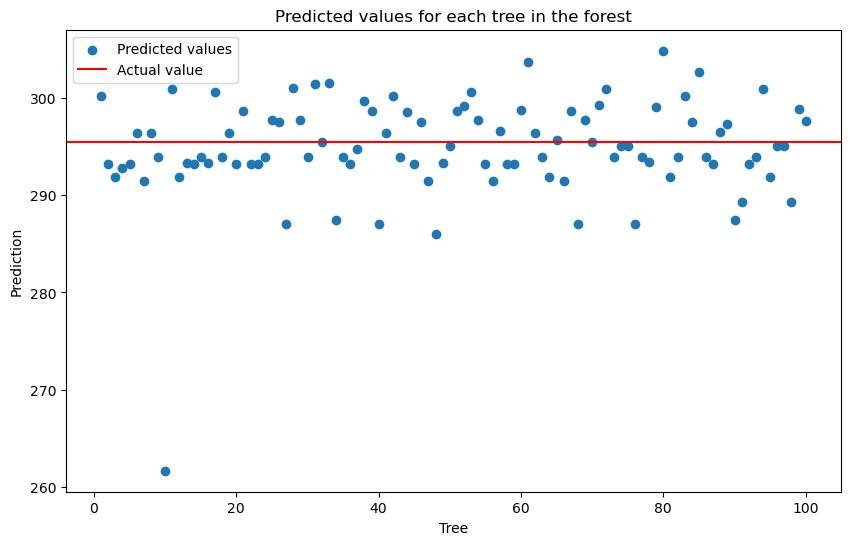

In [127]:
trees = list(range(1, len(predictions_samples) + 1))

plt.figure(figsize=(10, 6))
plt.scatter(trees, predictions_samples, label='Predicted values')
plt.axhline(y=test_sample_output, color='r', linestyle='-', label='Actual value')
plt.xlabel('Tree')
plt.ylabel('Prediction')
plt.title('Predicted values for each tree in the forest')
plt.legend()
plt.show()

In a random forest, individual trees can overestimate or underestimate for certain data points because each tree is trained on a random subset of features. However, by combining predictions from multiple trees and taking the average (or using another aggregation method), random forests become less susceptible to overfitting.

While our performs well with default parameters, it struggles to accurately represent specific events, such as low water levels after July 1st, 2018. To address this, we can use several techniques. Feature selection, which involves removing or adding relevant variables, is a powerful approach but will be covered in a future CodeGeo Workshop. Another thing we can try is hyperparameter tuning. Common ways to tune our model are **grid search** or **random search** to explore different hyperparameter combinations values. We will delve deeper into these methods in the future workshop as well. For now, we will manually evaluate a few hyperparameter combinations to see if they improve model performance.



### Let's change hyperparameter and see if we can do better

Let's take max_features = 2 (number of features to consider during each split) and max_depth = 15 (max depth of root and leaf node)

In [128]:
model_hyperparameter_v1 = RandomForestRegressor(max_features= 2, max_depth=15,  random_state=42)
model_hyperparameter_v1.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, max_features=2, random_state=42)

In [131]:
rf_prediction_hyper_v1 = model_hyperparameter_v1.predict(X_test)

### Check R2 and visualize it

In [132]:
score_hyper_v1 = r2_score(y_test, rf_prediction_hyper_v1)
print(f'R2 cofficient for tunned model: {score_hyper_v1}')

R2 cofficient for tunned model: 0.6676837017784809


Our tunned performed poorly compare to default model

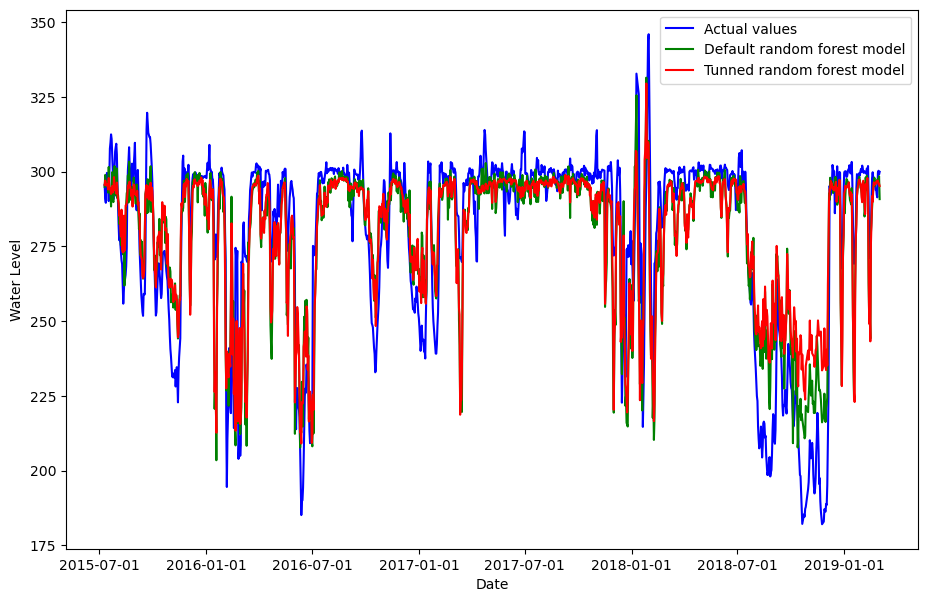

In [133]:
import matplotlib.dates as mdates

plt.figure(figsize=(11, 7))
plt.plot(y_test.index, y_test, label='Actual values', color='b')
plt.plot(y_test.index, rf_prediction_default, label='Default random forest model', color='g')
plt.plot(y_test.index, rf_prediction_hyper_v1, label='Tunned random forest model', color='r')
plt.xlabel('Date')
plt.ylabel('Water Level')
plt.legend()

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.show()